In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#1 LOADING THE DATA
data = pd.read_csv('C:/Users/monik/DATA Science/drugclassification.csv')

In [4]:
#understanding the data
#check first rows of data
data.head(7)

#since this is categorical data, it is used in classification tasks.

,Age,Gender,BloodPressure,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY


In [5]:
#check last rows of data
data.tail(5)

,Age,Gender,BloodPressure,Cholesterol,Na_to_K,Drug_Type
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
#Summary statistics of a DataFrame
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
#shows--Index, DataType, Memory information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    int64  
 1   Gender         200 non-null    object 
 2   BloodPressure  200 non-null    object 
 3   Cholesterol    200 non-null    object 
 4   Na_to_K        200 non-null    float64
 5   Drug_Type      200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
#shows number of rows and column
data.shape

(200, 6)

In [9]:
data.isnull().sum()

Age              0
Gender           0
BloodPressure    0
Cholesterol      0
Na_to_K          0
Drug_Type        0
dtype: int64

In [10]:
#Unique values and counts
data.nunique()

Age               57
Gender             2
BloodPressure      3
Cholesterol        2
Na_to_K          198
Drug_Type          5
dtype: int64

In [11]:
data.Gender.value_counts()

Gender
M    104
F     96
Name: count, dtype: int64

In [12]:
data.BloodPressure.value_counts()

BloodPressure
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [13]:
data.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Text(0.5, 1.0, 'Drug Types')

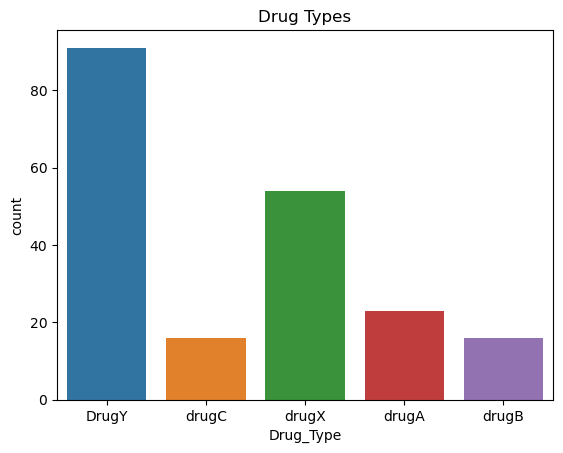

In [14]:
#plotting drug types
sns.countplot(x = data['Drug_Type'])
plt.title('Drug Types')

In [15]:
data_Gender = data.groupby(["Drug_Type","Gender"]).size().reset_index(name = "Count")
data_Gender

,Drug_Type,Gender,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


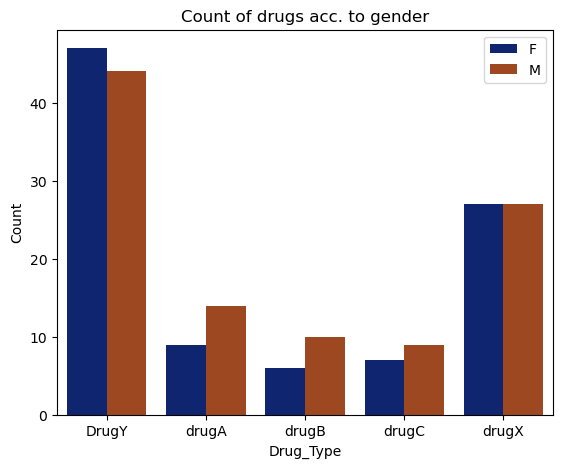

In [16]:
plt.figure(figsize = (6.4,5))
sns.barplot(x = "Drug_Type", y="Count", hue = "Gender", data=data_Gender,  palette='dark')
plt.title("Count of drugs acc. to gender")
plt.legend()
plt.show()

#According to this graph, Gender feature is not an important feature for classification.

In [17]:
data_BP_Drug = data.groupby(["Drug_Type","BloodPressure"]).size().reset_index(name = "Count")
data_BP_Drug

,Drug_Type,BloodPressure,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


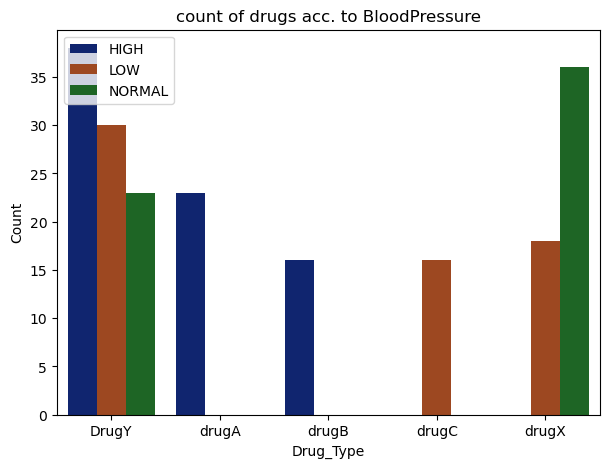

In [18]:
plt.figure(figsize = (7,5))
sns.barplot(x = "Drug_Type",y="Count", hue = "BloodPressure",data = data_BP_Drug, palette='dark')
plt.title("count of drugs acc. to BloodPressure")
plt.legend()
plt.show()

#BloodPressure is an important feature for classification.

Processing

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
leobject = LabelEncoder()

In [21]:
data['Gender'] = leobject.fit_transform(data['Gender'])
data['BloodPressure'] = leobject.fit_transform(data['BloodPressure'])
data['Cholesterol'] = leobject.fit_transform(data['Cholesterol'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    int64  
 1   Gender         200 non-null    int32  
 2   BloodPressure  200 non-null    int32  
 3   Cholesterol    200 non-null    int32  
 4   Na_to_K        200 non-null    float64
 5   Drug_Type      200 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
#dividing the data into two variable i.e. independent and dependent
x = data.drop(columns='Drug_Type')
y = data['Drug_Type']

Split the Data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1000)

In [25]:
x.head(7)

,Age,Gender,BloodPressure,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
5,22,0,2,0,8.607
6,49,0,2,0,16.275


In [26]:
y.head(5)

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug_Type, dtype: object

Models

In [27]:
#MODEL 1 : LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [28]:
#Fitting Logistic Regression to the training set 
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
#Predicting the test set result 
pred = model.predict(x_test)

In [31]:
acc_score = accuracy_score(y_test, pred)
print(acc_score)

0.86


In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       DrugY       0.92      0.89      0.91        27
       drugA       0.67      0.80      0.73         5
       drugB       0.67      0.80      0.73         5
       drugC       1.00      0.50      0.67         2
       drugX       0.91      0.91      0.91        11

    accuracy                           0.86        50
   macro avg       0.83      0.78      0.79        50
weighted avg       0.87      0.86      0.86        50



In [33]:
conf_matrix = confusion_matrix(y_test, pred)

Text(50.722222222222214, 0.5, 'Actual')

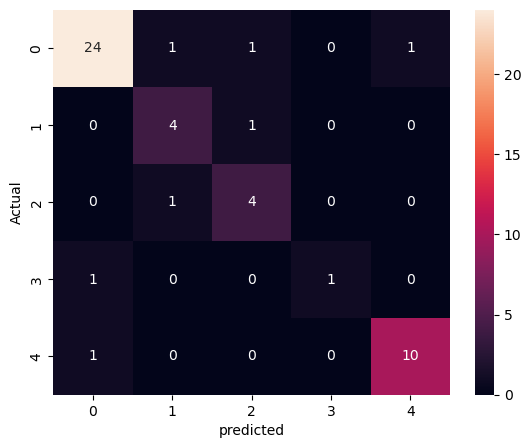

In [34]:
plt.figure(figsize=(6.4,5))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [35]:
#MODEL 2 : RANDOM FOREST 
model1 = RandomForestClassifier(n_estimators = 100)
model1.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
pred1 = model1.predict(x_test)

In [37]:
acc_score1 = accuracy_score(y_test, pred1)

In [38]:
print(acc_score1)

1.0


In [39]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        27
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [40]:
#Creating the Confusion matrix 
conf_matrix1 = confusion_matrix(y_test, pred1)
print(conf_matrix1)

[[27  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0 11]]


Text(50.722222222222214, 0.5, 'Actual')

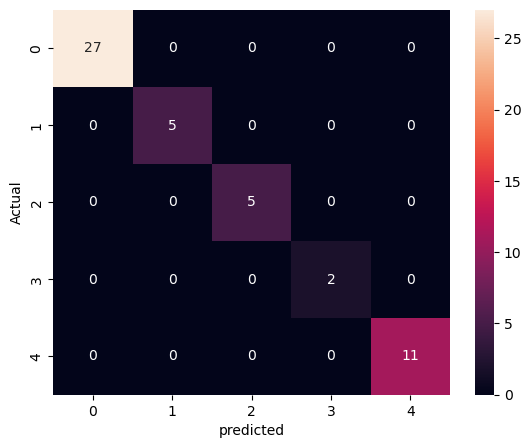

In [41]:
plt.figure(figsize=(6.4,5))
sns.heatmap(conf_matrix1, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [42]:
models = pd.DataFrame({
    'models': ['LogisticRegression','Random_Forest'],
    'scores': [acc_score,acc_score1]
})

In [43]:
models.sort_values(by='scores', ascending=True)

,models,scores
0,LogisticRegression,0.86
1,Random_Forest,1.00
